In [97]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [109]:
import numpy as np
import os
import matplotlib.pyplot as plt
import astropy
from astropy.table import Table,vstack, Column
from os import listdir
import scipy
from scipy import stats
from astropy.io import fits
import matplotlib.colors as colors
from numpy.ma import masked
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
import astropy.units as u
import seaborn as sns
import pandas

In [49]:
def useLatex():
    # Setup to use LaTeX in figure labels
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}"})
    plt.rcParams.update({'font.size': 14})


In [46]:
j_hdul =fits.open('MPhys/hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits')
j_hdul.info()

Filename: MPhys/hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  FILTERS       1 BinTableHDU     33   23R x 12C   [6A, E, E, E, E, E, E, E, E, E, E, E]   
  2  FLAG          1 BinTableHDU    161   94000R x 75C   [J, D, D, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E]   
  3  SIZE          1 BinTableHDU    100   94000R x 43C   [J, D, D, E, D, D, D, D, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
  4  CIRC          1 BinTableHDU    856   94000R x 423C   [J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E,

In [50]:
jades=Table.read('MPhys/hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits',format='fits',hdu=3)
#jades_z=Table.read('MPhys/hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits',format='fits',hdu=9)

In [51]:
jwst=Table.read('MPhys/data_release/lupt_jwst_final_cut.fits',format='fits')

In [54]:
jades

ID,RA,DEC,NPIX_DET,X,Y,XC,YC,BBOX_XMIN,BBOX_XMAX,BBOX_YMIN,BBOX_YMAX,R_KRON,R_KRON_S,PA,Q,A,B,FWHM,GINI,F090W_RHALF,F115W_RHALF,F150W_RHALF,F182M_RHALF,F200W_RHALF,F210M_RHALF,F277W_RHALF,F335M_RHALF,F356W_RHALF,F410M_RHALF,F430M_RHALF,F444W_RHALF,F460M_RHALF,F480M_RHALF,F435W_RHALF,F606W_RHALF,F775W_RHALF,F814W_RHALF,F850LP_RHALF,F105W_RHALF,F125W_RHALF,F140W_RHALF,F160W_RHALF
uint32,float64,float64,float32,float64,float64,float64,float64,uint32,uint32,uint32,uint32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
519,53.11341212289474,-27.923778367040864,178.0,12917.056232326719,2553.797411527974,12917.437351959676,2553.6169745409156,12910,12926,2546,2561,0.3070113,0.14736542,33.154137,0.9242004,0.09434537,0.087194026,0.21391208,0.40688744,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936,0.13265936
522,53.11363907631932,-27.923760491623977,196.0,12892.988576904854,2555.9446674189276,12893.108851002718,2556.767349189687,12884,12901,2549,2565,0.30258814,0.14524232,23.090853,0.81531435,0.12236987,0.099769905,0.2628997,0.2285922,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504,0.2168504
528,53.113291495408944,-27.923707973106126,38.0,12929.849113392389,2562.2452146312417,12929.943678802254,2562.4024916389103,12927,12933,2560,2565,0.13571218,0.06514184,-13.770763,0.845924,0.049810965,0.04213629,0.10863608,0.2554773,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999,0.11302999
529,53.113659821274354,-27.923673664324607,120.0,12890.789402373886,2566.365978426608,12890.8298349846,2566.411069328334,12884,12898,2560,2574,0.1979507,0.095016345,39.017376,0.5699153,0.10794352,0.061518665,0.20687835,0.30422235,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357,0.12621357
538,53.11370277246355,-27.923571621702475,206.0,12886.235442281057,2578.6136305037476,12886.34659712766,2577.2428345663916,12879,12892,2567,2589,0.27575186,0.1323609,-84.95676,0.644239,0.14198874,0.09147469,0.28124294,0.2735164,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158,0.32773158
549,53.11399120971899,-27.923411037494503,464.0,12855.648749279855,2597.8894288551733,12854.888781401016,2598.7891818649955,12838,12866,2587,2612,0.4077776,0.19573326,-44.159027,0.62546957,0.18085892,0.113121755,0.35520524,0.4601047,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559,0.19168559
550,53.1136670777497,-27.92344334468529,140.0,12890.021922617505,2594.0093549253193,12890.265943291903,2593.7762469601944,12882,12897,2587,2602,0.27301612,0.13104774,49.582504,0.92923576,0.10585741,0.098366484,0.24061698,0.25900745,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
560,53.112939903264746,-27.923323312786135,75.0,12967.138260860907,2608.409795282133,12967.00542556

In [52]:
jwst.add_column(np.nan,name='jades_size')

In [53]:
jwst.add_column(np.nan,name='jades_half_light_rad')

In [25]:
print(jades['R_KRON'].unit)

None


In [55]:
#matching jwst and candels
ra1=jwst['ra']

dec1=jwst['dec']
ra2=jades['RA']
dec2=jades['DEC']
print(len(ra1))

20114


In [56]:
jwst_cat = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)#dawn
jades_cat = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)#candels


In [57]:
max_sep = 0.1 * u.arcsec
idx, d2d, d3d = jwst_cat.match_to_catalog_sky(jades_cat)#catalog = candels information
idx_jwst, d2d_jwst, d3d_jwst = jades_cat.match_to_catalog_sky(jwst_cat)


In [59]:
for i in range(len(jades)):
    
    jwst['jades_size'][idx_jwst[i]]=jades['R_KRON'][i]
    jwst['jades_half_light_rad'][idx_jwst[i]]=jades['F444W_RHALF'][i]


/home/jo_shepton/anaconda3/envs/py3/lib/python3.11/site-packages/astropy/table/column.py:1362: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value


In [60]:
jades_good =np.ones(len(jwst))
for i in range(len(jwst)):
    if np.isnan(jwst['jades_size'][i]) or np.isnan(jwst['jades_half_light_rad'][i]) :
        jades_good[i]=0
jwst_jades = jwst[np.array(jades_good,dtype=bool)]

In [61]:
size = jwst_jades['lupt_f444w-clear_aper2']/jwst_jades['lupt_f444w-clear_aper1']

In [63]:
size_comp.add_column(size,name='jwst_size_proxy')

In [64]:
good_size = np.ones(len(size_comp))
for i in range(len(size_comp)):
    if np.ma.is_masked(size_comp['jwst_size_proxy'][i]):
        good_size[i]=0
        
size_comp = size_comp[np.array(good_size,dtype=bool)]

In [65]:
size_comp.write('MPhys/data_release/size_comparison.fits',format='fits',overwrite=True)

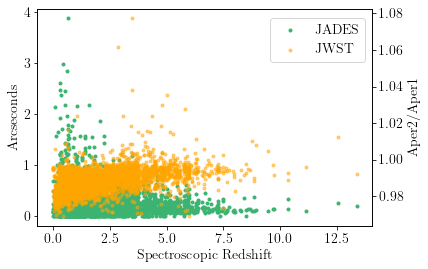

In [47]:
fig,ax=plt.subplots(1,1,sharex=True,sharey=True,figsize=(6,4))
useLatex()


ax.set_xlabel('Spectroscopic Redshift',fontsize=14)

ax.set_ylabel('Arcseconds',fontsize=14)
ax2 = ax.twinx()
#ax.scatter(size_comp['z_spec'],size_comp['jades_size'],marker='.',label='JADES',color ='mediumseagreen',alpha=1)
#ax2.scatter(size_comp['z_spec'],size_comp['jwst_size_proxy'],marker='.',color='orange',label='JWST',alpha=0.5)
fig.legend(loc = 'upper right', frameon=True,bbox_to_anchor= (0.9,0.87))
ax2.set_ylabel('Aper2/Aper1',fontsize=14)
plt.savefig('MPhys/data_release/JADES_size_comp.pdf',bbox_inches='tight')

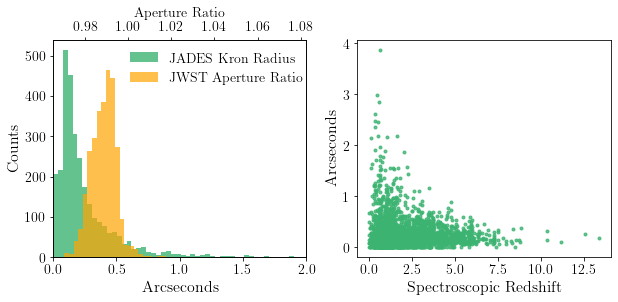

In [174]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].hist(size_comp['jades_size'],color = 'mediumseagreen',label='JADES Kron Radius',bins=100,alpha=0.8)
#ax.hist(size_comp['jades_half_light_rad'],color = 'darkgreen',label='F444W Half Light Radius',bins=100)
ax[0].set_xlim(0,2)
ax[0].set_xlabel('Arcseconds',fontsize=16)
ax[0].set_ylabel('Counts',fontsize=16)
ax2 = ax[0].twiny()

ax2.set_xlabel('Aperture Ratio')
ax2.hist(size_comp['jwst_size_proxy'],color = 'orange',label='JWST Aperture Ratio',bins=50,alpha=0.7)
ax[1].scatter(size_comp['z_spec'],size_comp['jades_size'],marker='.',color ='mediumseagreen',alpha=0.8)
ax[1].set_ylabel('Arcseconds',fontsize=16)
ax[1].set_xlabel('Spectroscopic Redshift',fontsize=16)
#ax[1].set_title('JADES Kron')
fig.legend(bbox_to_anchor =(0.49,0.88),frameon=False)
plt.savefig('MPhys/data_release/JADES_size_comp_hist.pdf',bbox_inches='tight')

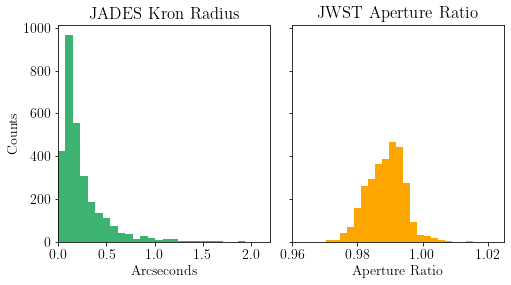

In [139]:
fig,ax=plt.subplots(1,2,figsize=(8,4),sharey=True)
ax[0].hist(size_comp['jades_size'],color = 'mediumseagreen',label='JADES Kron Radius',bins=50)
ax[1].hist(size_comp['jwst_size_proxy'],color = 'orange',label='JWST Aperture Ratio',bins=50)
ax[0].set_xlim(-0.001,2.2)
ax[1].set_xlim(0.96,1.025)
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Arcseconds')
ax[1].set_xlabel('Aperture Ratio')
ax[0].set_title('JADES Kron Radius')
ax[1].set_title('JWST Aperture Ratio')
plt.subplots_adjust(hspace=0.,wspace=0.1)
plt.show()